# COMP3115/4115: Exploratory Data Analysis and Visualization
# Semester 2, 2021/22

# Lab 6: Advanced Visualization

In this lab session, we will learn some advanced visualization techniques that you can use to visualize different types of data, including structured data, text data, and geospatial data. We will work with pandas and a number of visualization toolboxes, including `seaborn`, `wordcloud` and `folium`.

To ease your burden in configuring your local environment, we use Google Colab environment in this lab session. Google colab is like an online out-of-box Jupyter Notebook provided by Google. It has a wide range of deep learning libraries built in, and so it can be used to implement and execute deep learning algorithms interactively. See its [getting started guide](https://colab.research.google.com/) for more information.


</br>

If you do not want to use colab, you can download this notebook and install the packages by running the following commands in Anaconda Prompt:
```bash
pip install palmerpenguins
conda install -c https://conda.anaconda.org/conda-forge wordcloud
pip install folium
```
To show the maps in your local Jupyter Notebook, you need to click "File -> Truest Notebook".

# 1. Structured Data
Structured data, or tabular data, is arguably the most common format to represent data. In this session, we use the package `pandas` to organize the data and use the package `seaborn` to visualize them. `seaborn` works smoothly with pandas.DataFrame and is a great starting point for exploratory analysis. We will explore a penguins dataset using the tools.

If you are interested in more details of the `seaborn` package, you can check out their official tutorials: https://seaborn.pydata.org/tutorial.html


## (0) Meet the Palmer Penguins (gain more ideas about data)

<center>
<img src="https://camo.githubusercontent.com/1d187452ac3929cfde8f5760b79f37cc117c1a332227d37a8c50db50d3db632a/68747470733a2f2f616c6c69736f6e686f7273742e6769746875622e696f2f70616c6d657270656e6775696e732f7265666572656e63652f666967757265732f6c7465725f70656e6775696e732e706e67" alt="drawing" width="600"/> 

Artwork by @allison_horst.   
<font size=2><i>GitHub page: https://github.com/mcnakhaee/palmerpenguins</i></font>
</center>

`Palmer Penguins` is a dataset, obviously, about penguins. Here is a short overview:
> Size measurements, clutch observations, and blood isotope ratios for 344 adult foraging Adélie, Chinstrap, and Gentoo penguins observed on islands in the Palmer Archipelago near Palmer Station, Antarctica. Data were collected and made available by [Dr. Kristen](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) Gorman and the [Palmer Station, Antarctica Long Term Ecological Research (LTER)](https://pal.lternet.edu/) Program. *(Quoted from the Github page)*

<center>
<img src="https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png" alt="drawing" width="400"/> 

Meaning of "bill_length_mm" and "bill_depth_mm" in the dataset.   
<font size=2><i>Image Credit: https://github.com/allisonhorst/palmerpenguins</i></font>
</center>


In [1]:
!pip install palmerpenguins  # it is only for getting the palmerpenguins dataset needed in this lab

In [2]:
# import pandas and seaborn
import pandas as pd
import seaborn as sns

# let's get the dataset ready (dataframe data structure) first
from palmerpenguins import load_penguins
penguins = load_penguins()

In [20]:
# check what's in the dataset by looking at its first 10 rows
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007


In [4]:
# some observations are missing, so we first drop them.
penguins = penguins.dropna()
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007


In [21]:
# check the data types of different columns
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [6]:
# some basic statistics of the numerical values
# try also penguins.describe(include='all')
# try also penguins.describe(exclude=['category'])
# try also penguins.describe(exclude=['number'])
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [22]:
# Let's see some statistics about the categorical variables `island` and `species`
print(penguins['species'].value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64


In [23]:
print(penguins['island'].value_counts())

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64


## (1) Visualizing distributions
Visualizing distributions is an important part of exploratory data analysis. Bar chats, Violin plots, Histogram, and Box plots are useful tools to visualize a distribution. Let's see some examples.

<AxesSubplot:xlabel='species', ylabel='count'>

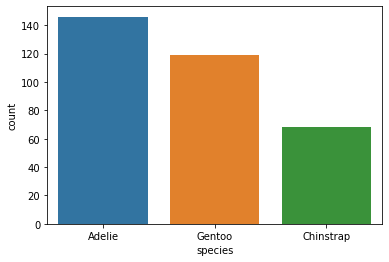

In [26]:
# We can make a bar plot to visualize the count of each species in each island.
# To make plots with seaborn, we can pass the entire DataFrame object to the plotting functions,
#   and specify the X and/or Y axes. Just make sure to call the right function.
sns.countplot(data=penguins, x='species')

<AxesSubplot:xlabel='species', ylabel='count'>

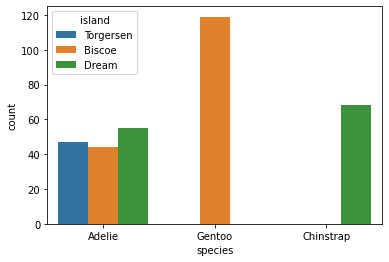

In [27]:
# `hue` is a useful argument that allows us to use different colors to represent
#   different categories.
sns.countplot(data=penguins, x='species', hue='island')

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

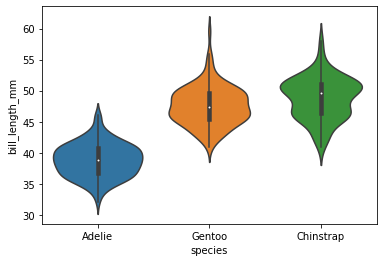

In [28]:
# We can make a violin plot about their bill length and the species
sns.violinplot(data=penguins, x='species', y='bill_length_mm')

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

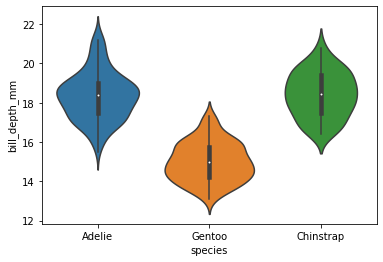

In [29]:
# We can also make a violin plot about their bill depth and the species
sns.violinplot(data=penguins, x='species', y='bill_depth_mm')

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

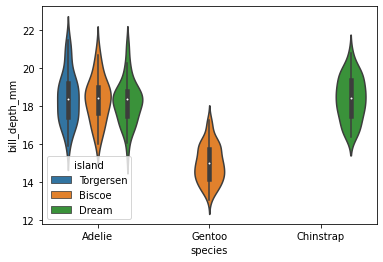

In [30]:
# We can also see how the distribution differ in different islands for different species
sns.violinplot(data=penguins, x='species', y='bill_depth_mm', hue='island')

<AxesSubplot:ylabel='bill_depth_mm'>

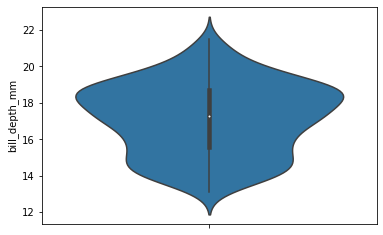

In [31]:
# If we don't specify the X axis, we are looking at the distribution of all species (the marginal distribution)
sns.violinplot(data=penguins, y='bill_depth_mm')

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

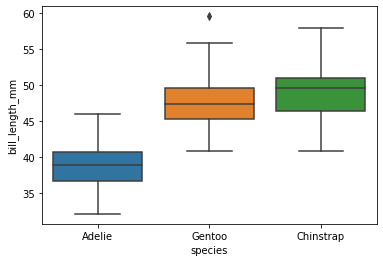

In [32]:
# We can also use the box plot
sns.boxplot(data=penguins, x='species', y='bill_length_mm')

<AxesSubplot:xlabel='bill_length_mm', ylabel='species'>

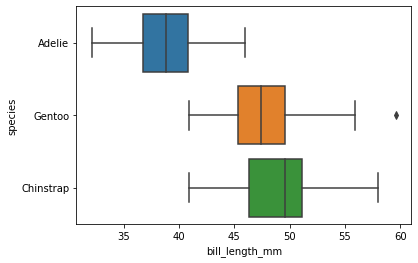

In [33]:
# We can also swap the X and Y axes to have a horizontal version
sns.boxplot(data=penguins, x='bill_length_mm', y='species')

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

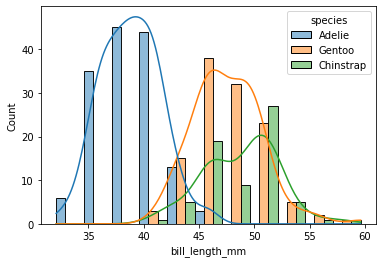

In [42]:
# a histogram is also good
sns.histplot(data=penguins, x='bill_length_mm', hue='species', multiple='dodge', kde=True)  # plot the kenel density estimation
# try also sns.histplot(data=penguins, x='bill_length_mm', hue='species')

In [75]:
# You can try it out:
# Try to plot some figures to look at the distribution of 'flipper_length' and 'body_mass_g'

# (2) Visualizing correlations
It might be interesting to ask if the length and depth of the bills of penguins are somehow correlated. Let's make some plots to see if we can observe some obvious patterns.

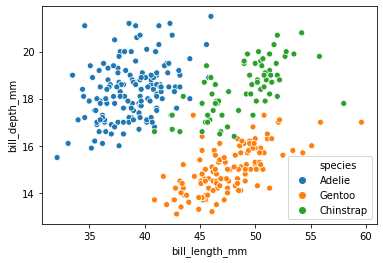

In [83]:
# Pass the entire DataFrame using the 'data' argument and specify the column names in arguments 'x' and 'y'
# To distinguish different species, we feed the 'hue' argument the column name of 'species'

sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

Now it looks like that the depth and length of their bills are positively correlated. But can we really be sure by just visual inspection? To make it clearer, we can plot a simple linear regression using seaborn and see if the coefficient is positive (a lower-left-to-upper-right line).

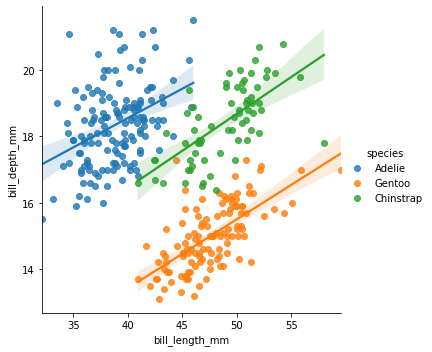

In [20]:
# Plot linear regressions
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

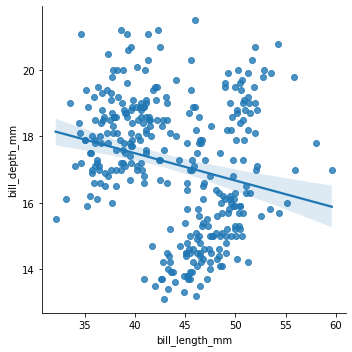

In [22]:
# For a comparison, let's see what happens if we plot a linear regression of all data points including all three different species
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')

Big suprise! The correlation now becomes negative. This tells us that we should always be vigilant to suspicious correlations during exploratory analysis. Sometimes, domain knowledge could help. 

(Just in case you are curious why this could happen, it is called "Simpson’s paradox". There are a lot more interesting examples about it. See https://en.wikipedia.org/wiki/Simpson%27s_paradox)

In [23]:
# You can try it out:
# Try to plot some figures to look at the correlation between 'flipper_length' and 'body_mass_g'

# 2. Text Data
Data are also commonly recorded in free text, like review comments. In this part, we will see how to visualize the text data, specifically the word frequency in the text. To do this, we can draw word clouds, which extract some frequent words from the text. The more frequent the words, the bigger and bolder they appear in the plots.

In [68]:
import wordcloud as wc
import matplotlib.pyplot as plt

# you can also do the same thing usng

In [69]:
# This is a part of the Amazon Fine Food Reviews: https://www.kaggle.com/snap/amazon-fine-food-reviews
# We have provided you the file reviews_1k.csv. Put that in the same folder of this jypytor notebook file.
# But if you want to run the code in colab environment, the uploaded file may disappear after disconnecting
# from the run-time. Then, you need to upload the file again. You can automate that using the following code.
#
# import urllib
# data_url = 'https://drive.google.com/uc?export=download&id=15_7HhatAr9IHTX2lE3O5UKSnd4fqsPaQ'
# try: 
#    urllib.URLopener().retrieve(data_url, './reviews_1k.csv')
# except: 
#    urllib.request.urlretrieve(data_url, './reviews_1k.csv')

In [70]:
reviews = pd.read_csv('./reviews_1k.csv')

In [71]:
# check what's in the dataset
reviews.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


<AxesSubplot:xlabel='Score', ylabel='count'>

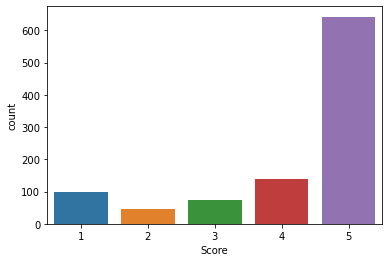

In [72]:
# Let's see the distribution of the scores given by the customers
sns.countplot(data=reviews, x='Score')

In [73]:
# Let's make a word cloud to see what the customers said

# Fist, get a long string by concatenating all the text in the reviews
review_all = ' '.join(reviews['Text'].tolist())

# Remove some html labels
review_all = review_all.replace('<br />', ' ')

In [74]:
# Now we have a long sentence
review_all

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo". This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch. If you are looking for the secret

In [75]:
# Generate a word cloud image
wordcloud = wc.WordCloud(background_color='white').generate(review_all)

(-0.5, 399.5, 199.5, -0.5)

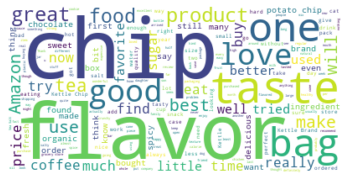

In [76]:
# We can display it
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # turn off the axis

In [77]:
# We can also filter the reviews by products and see what's the most frequent words
#  in positive and negative reviews for them

# First, we can get a sorted list of the frequency of the products
products_sorted = reviews['ProductId'].value_counts()
products_sorted

B000G6RYNE    217
B000G6MBX2     52
B000ER6YO0     49
B002BCD2OG     20
B000HDMUQ2     20
             ... 
B0057FTBYO      1
B0037ZFEW4      1
B005P0HHGK      1
B001SB099M      1
B001E4KFG0      1
Name: ProductId, Length: 207, dtype: int64

In [78]:
# Let's first define a function to process split data into positive and negative,
#   process the text and make the plots
def make_pos_neg_wordclouds(data):
    # first filter the positive reviews
    reviews_pos = data[data['Score']>=4]

    # make a long string
    reviews_pos = ' '.join(reviews_pos['Text'].tolist())
    reviews_pos = reviews_pos.replace('<br />', ' ')

    # generate a word cloud
    wordcloud_pos = wc.WordCloud(background_color='white').generate(reviews_pos)

    # do the same for negative reviews
    reviews_neg = data[data['Score']<=2]

    reviews_neg = ' '.join(reviews_neg['Text'].tolist())
    reviews_neg = reviews_neg.replace('<br />', ' ')

    wordcloud_neg = wc.WordCloud(background_color='white').generate(reviews_neg)

    return wordcloud_pos, wordcloud_neg

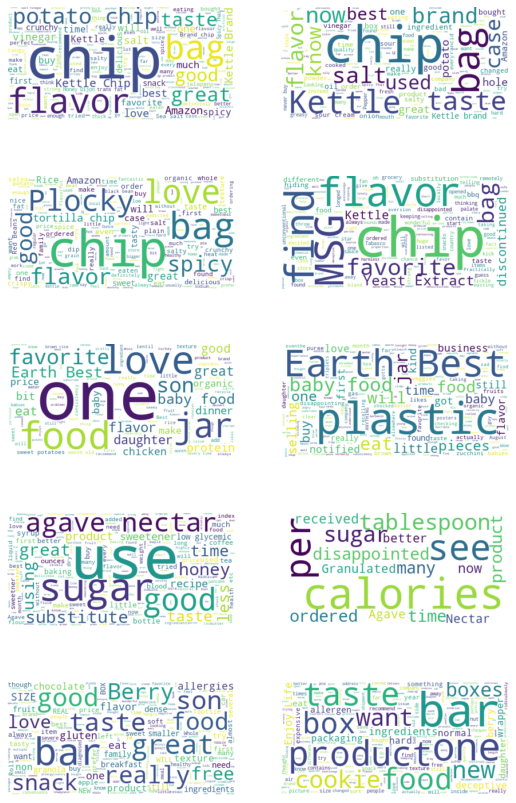

In [79]:
# Let's plot the word cloud for the first five products

N = 5

fig, axes = plt.subplots(N, 2, figsize=(9, 15))
for i, product_id in enumerate(products_sorted.index[:N]):
    # select reviews for this product
    reviews_i = reviews[reviews['ProductId']==product_id]

    # pass the selected data to the function and get the generated word clouds
    wordcloud_pos, wordcloud_neg = make_pos_neg_wordclouds(reviews_i)

    # show the positive and negative plots
    axes[i, 0].imshow(wordcloud_pos, interpolation='bilinear')
    axes[i, 0].axis("off")  # tune off the axis

    axes[i, 1].imshow(wordcloud_neg, interpolation='bilinear')
    axes[i, 1].axis("off")  # tune off the axis

We can make more fancy word cloud plots using a masking image.

In [101]:
import PIL.Image as Im  # We need the PIL package to process the masking image
import numpy as np

In [102]:
# Get a masking image
# We have provided you the file wine_mask.png. Put that in the same folder of this jypytor notebook file.
# But if you want to run the code in colab environment, the uploaded file may disappear after disconnecting
# from the run-time. Then, you need to upload the file again. You can automate that using the following code.
#data_url = 'https://drive.google.com/uc?export=download&id=1SCxNHBzuwkcaBO9Sdm86Jy0cXXKb4l59'
#try: 
#    urllib.URLopener().retrieve(data_url, './wine_mask.png')
#except: 
#    urllib.request.urlretrieve(data_url, './wine_mask.png')

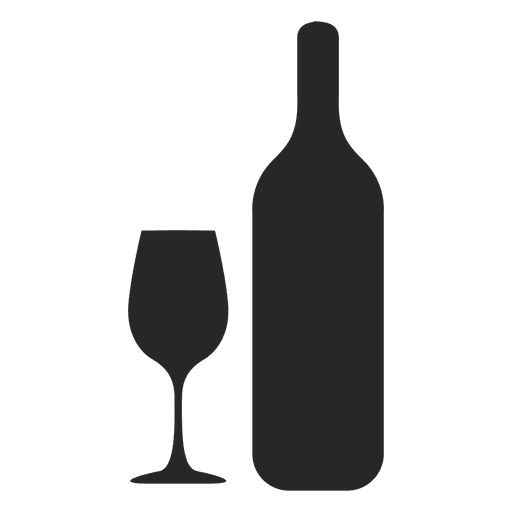

In [103]:
wine_mask_img = Im.open('./wine_mask.png')
display(wine_mask_img)  # Show the masking image

The masking image works in this way: we set the values of pixles in the masking image where we want to mask out to 255, and the remaining to 1. So we first transform this image per this requirement

In [87]:
wine_mask = np.array(wine_mask_img)
wine_mask[wine_mask>0] = 1
wine_mask[wine_mask==0] = 255

(-0.5, 511.5, 511.5, -0.5)

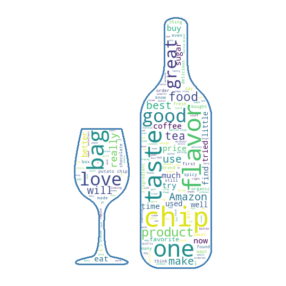

In [88]:
# Now we can generate the word cloud with the masking image

masked_cloud = wc.WordCloud(background_color="white", max_words=2000, mask=wine_mask,
                         contour_width=3, contour_color='steelblue') 

masked_cloud.generate(review_all)

# show the plot
plt.figure(figsize=(5,5))
plt.imshow(masked_cloud, interpolation='bilinear')
plt.axis("off")

# 3. Geospatial Data
In this part, we will see how we can make visualizations of geospatial data. We will use the `Folium` package.

In [89]:
import folium as fol

In [90]:
# We can get a base map easily using folium. To get the latitude and longitude of a chosen location, you can go
# to google map, click a point, and then right click the point to get the information.
map = fol.Map(location=[22.3193, 114.1694])

In [91]:
# we can display it in a Jupyter notebook
map

In [92]:
# We can set the initial zoom level
map = fol.Map(location=[22.3393, 114.1824], zoom_start=16)
map

In [100]:
# We can set some markers 
map = fol.Map(location=[22.3383, 114.1824], zoom_start=18)

fol.Marker(
    location=[22.338736103814473, 114.18203111076629],
    popup='Shaw Tower',
    icon=fol.Icon(color='red')
).add_to(map)

fol.CircleMarker(
    location=[22.33783591997964, 114.18282723535445],
    radius=100,
    popup='Joint Sports Center',
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(map)


map

## Choropleth maps
We can easily create Choropleth maps binding data between Pandas DataFrames/Series and Geo/TopoJSON geometries. A description of the GeoJSON format can be found in https://en.wikipedia.org/wiki/GeoJSON. For other datasets, you can search online to find proper GeoJSON files.

We use an official example dataset the US unemployment data as an example.

In [122]:
# We first load data from the folium GitHub
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json" # f-string: an easy way to format a string
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)
state_geo

'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

In [120]:
# See what's in the data
state_data.head(10)

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8


In [97]:
# Create a US map
map_us = fol.Map(location=[48, -102], zoom_start=3)
map_us

In [127]:
# reset the map
map_us = fol.Map(location=[48, -102], zoom_start=3)

# We can create a Choropleth map by creating the following object
fol.Choropleth(
    geo_data=state_geo,  # A GeoJSON file for the US
    name="mychoropleth",  # Set a name for the visualization layer
    data=state_data,  # Set the DataFrame object
    columns=["State", "Unemployment"],  # columns of the DataFrame to work on
    key_on="feature.id",  # Variable in the `geo_data` GeoJSON file
    fill_color="BuPu",   # Color schema
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(map_us)

fol.LayerControl().add_to(map_us)

map_us